<a href="https://colab.research.google.com/github/aquangnguyen1992/tensorflow_colab/blob/mnist_max/mnist_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import data from Google Drive and setup the workspace***

In [1]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree('/content/drive/My Drive/MNIST','/content/MNIST')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/MNIST'

In [2]:
train_data_path = '/content/MNIST/train_max_x'
test_data_path = '/content/MNIST/test_max_x'
label_file = '/content/MNIST/train_max_y.csv'

# ***Read the dataset and show an example***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_pickle(train_data_path)
#test_data = pd.read_pickle(test_data_path)
train_label = pd.read_csv(label_file)
y = train_label['Label']

In [ ]:
i = np.random.randint(0, dataset.shape[0])
sample = dataset[i]
print(y[i], sample[0])
plt.imshow(sample)

In [5]:
dataset = dataset/255.0
#test_data = test_data/255.0
number_of_label = np.unique(np.array(y), return_counts=True)
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size=0.2, random_state=100)

(40000, 128, 128) (10000, 128, 128)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

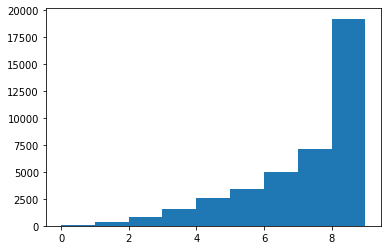

In [12]:
print(X_train.shape, X_val.shape)
plt.hist(np.array(Y_train), bins=range(len(number_of_label[0])))
number_of_label[0]

# ***Keras Solution***

In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam

In [27]:
def create_model(conv2d_1=32, str_1=1, conv2d_2=32, str_2=1, dense_node=32, dr=0.0, batch_size=32):
  my_model = Sequential()
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), strides=(str_1, str_1), activation='relu', input_shape=(batch_size, X_train.shape[1], X_train.shape[2])))
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), activation='relu'))
  my_model.add(Flatten())
  my_model.add(Dropout(dr))
  my_model.add(BatchNormalization())
  my_model.add(Dense(dense_node, activation='relu'))
  my_model.add(Dense(len(number_of_label), activation='relu'))

  optimizer = Adam(lr=0.0001, amsgrad=True)
  
  my_model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy', 'loss'])
  
  return my_model

In [29]:
batch_size = 32
my_model = create_model(conv2d_1=32, str_1=3, conv2d_2=32, str_2=1, dense_node=32, dr=0.0, batch_size=batch_size)
my_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 10, 42, 32)        36896     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 40, 32)         9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 10240)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 10240)             0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 10240)             40960     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                327712    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)
filepath="weight_model_cnn_best.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', save_weights_only=False, verbose=1, save_best_only=True, mode='max')


history = my_model.fit(
  X_train, Y_train,
  epochs=300, validation_split = 0.2, verbose=1,
  batch_size = batch_size,
  callbacks=[early_stop, checkpoint])